# Introduction

__Context:__

* Data : $X \in \mathbb{R}^d$ 


* Classes : $Y \in \{-1,1\}$

* Classifier :
$g^*(x) = \left\{\begin{array}{ll}1 & if~\mathbb{P}(Y = 1 | X = x) >\mathbb{P}(Y = -1 | X = x) \\-1 & else\end{array}\right.$

* sample size n

__Hypothesis:__

* $X|Y=1\sim \mathcal{N}(\mu_+, \Sigma)$

* $X|Y=-1\sim \mathcal{N}(\mu_-, \Sigma)$

__Results:__


$g^*(x) = \left\{\begin{array}{ll}1 & if ~ h(x)+b>0\\-1 & else\end{array}\right.$

with:

$h(x) = (\mu_+ - \mu_-)^T\Sigma^{-1}x$

$b =\frac{1}{2}(\mu_- \Sigma^{-1}\mu_- -\mu_+ \Sigma^{-1}\mu_+) +  log(\frac{\pi_+}{\pi_-})$

$\pi_+ = \mathbb{P}(Y=1) \quad \pi_- = \mathbb{P}(Y=-1)$

__Maximum likelihood estimate:__

$\hat{\pi_i} = \frac{1}{n}\#[Y = i]$

$\hat{\mu_i} = \frac{1}{\#[Y = i]}\sum_{Y_j=i}X_j$

$\hat{\Sigma_i}\frac{1}{\#[Y = i]}\sum_{Y_j=i}(X_j-\hat{\mu_i})(X_j-\hat{\mu_i})^T$ 

# Algorithm

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator
from sklearn.discriminant_analysis import LinearClassifierMixin

In [9]:
class LDA(BaseEstimator, LinearClassifierMixin):
    """
        LDA classifier for two classes (-1,1)
    """
    def __init__(self, prior=None):
        """
            prior: wether to use prior in the intercept. Default is false.
        """
        self.prior = prior
        self.coef = None
        self.intercept = None
        
    def fit(self, X, y):
        #X data numpy array size (n,p)
        #Y class numpy array size (n,)
        cov = np.cov(X.T, bias=2)
        invcov = np.linalg.inv(cov)
        mu1 = X[y==1, :].mean(axis=0)
        mu2 = X[y==-1, :].mean(axis=0)
        if not self.prior:
            pi1, pi2 = 0.5, 0.5
        else:
            pi1, pi2 = np.mean(y == 1), np.mean(y == -1)
        self.coef = invcov.dot(mu1-mu2)
        self.intercept = 0.5*(mu2.dot(invcov.dot(mu2)) - mu1.dot(invcov.dot(mu1))) + np.log(pi1/pi2)
        return self

    def decision_function(self, X):
        return X.dot(self.coef) + self.intercept

    def predict(self, X):
        return (self.decision_function(X) > 0).sign()

# Exemple

In [14]:
def plot_frontiere(clf, data=None, num=200, label=None,ax=plt):
    """
        Plot the frontiere f(x)=0 of the classifier clf within the same range as the one
        of the data.
        Input:
            clf: binary classifier with a method decision_function
            data: input data (X)
            num: discretization parameter
    """
    xmin, ymin = data.min(axis=0)
    xmax, ymax = data.max(axis=0)
    x, y = np.meshgrid(np.linspace(xmin, xmax, num), np.linspace(ymin, ymax))
    z = np.fabs(clf.decision_function(np.c_[x.ravel(), y.ravel()])).reshape(x.shape)
    zmin, zmax = z.min(), z.max()
    ind = np.where((z-zmin)/(zmax-zmin) < 0.001)
    ind_sort = np.argsort(y[ind])
    ax.plot(x[ind][ind_sort], y[ind][ind_sort], label=label, linewidth=2)

In [15]:
def plotXY(X, Y, ax=plt):
    X1 = X[Y == 1]
    X2 = X[Y == -1]
    ax.plot(X1[:, 0], X1[:, 1], ">", label="Class 1")
    ax.plot(X2[:, 0], X2[:, 1], "d", label="Class 2")

In [41]:
p = 2;
n = 100;

In [42]:
mu1 = np.random.randn(p)
mu2 = np.random.randn(p)
A = np.random.rand(p,p)
sigma = np.dot(A,A.transpose())

In [43]:
n1 = np.random.randint(1,90);
n2 = n - n1;
X1 = np.random.multivariate_normal(size=n1,mean=mu1,cov=sigma)
X2 = np.random.multivariate_normal(size=n2,mean=mu2,cov=sigma)

In [44]:
Y1 = np.ones(n1)
Y2 = -np.ones(n2)

LDA parameters:
[0.17488988 0.984588  ] -0.8148342809780189


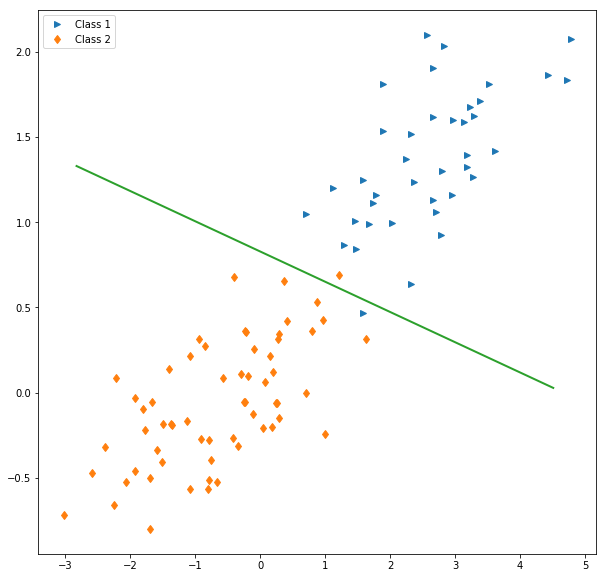

In [45]:
X = np.r_[X1, X2]
Y = np.r_[np.ones(X1.shape[0]), -np.ones(X2.shape[0])]

lda = LDA()
lda.fit(X, Y)
print("LDA parameters:")
print(lda.coef / np.linalg.norm(lda.coef), lda.intercept / np.linalg.norm(lda.coef))

fig, ax = plt.subplots(figsize=(10,10))
plotXY(X, Y,ax)
plot_frontiere(lda, X,ax = ax)
plt.legend(loc="best");